# Making rearranging Videos

Comes from December 7th 2017, (Thursday) Data Analysis Notebook, data from december 7th and december 8th

In [1]:
year="2017"
month="December"
day="8"

## Analysis Code Update Plans

- Better Documentation
- Maintain coordinates
- Better histogram fitting
- option to just input guess for hist

## Imports and initialization

### Miscellaneous Imports

In [2]:
from PIL import Image

In [3]:
import numpy as np

In [4]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True);

In [5]:
from matplotlib import rcParams
from matplotlib import style
from matplotlib.pyplot import *
%matplotlib notebook
# inline
# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
style.use(['seaborn-darkgrid'])
#style.use(['seaborn-dark-palette'])

### old solarized stuff
# style.use(['dark_background'])
# mpl.rcParams['axes.facecolor'] = '#0a0a0a'
# the default cycling of colors in this mode isn't very good.
# mpl.rcParams['axes.prop_cycle'] = cycler('color', ['r','c','g','#FFFFFF','y','m','b'])
### General
rcParams['figure.figsize'] = (18.0, 8.0)
rcParams['axes.grid'] = True
rcParams['axes.formatter.useoffset'] = False
rcParams['grid.alpha'] = 0.3
rcParams['axes.formatter.limits'] = (0,3)
# jet is awful.
rcParams['image.cmap'] = 'viridis'
# to see all available options, decomment this line.
# print(mpl.rcParams)
rcParams['font.size'] = 14

In [6]:
import ExpFile as exp

In [7]:
from ExpFile import setPath

In [8]:
setPath(day, month, year);

In [9]:
from ExpFile import setPath
import ExpFile as exp
from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc

from importlib import reload
def reloadMyModules():
    reload(exp)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    setPath(day,month,year)

reloadMyModules()
getVersions()

,Version
PrintVersions;,1.0
mainAnalysis:,1.4
AnalysisHelpers:,1.4
bokehPlotters:,1.0
fittingFunctions:,1.0
MarksConstants:,1.0
MarksFourierAnalysis:,1.0
matplotlibPlotters:,1.1
miscellaneous:,1.0
plotlyPlotters:,1.6


# Please run and freeze the "versions" output above before starting work.

### prelim defs for this notebook

In [10]:
location = 'C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/Inferno/'

In [29]:
def savePureIm(imData, name):
    fig = figure(frameon=False)
    fig.set_size_inches(9,15)
    ax = Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(imData, origin='bottom', cmap='inferno')
    grid(False)
    axis('off');
    savefig(name)

In [12]:
def findMatches(arrangement, runNum, threshold=210, lim=None, lowLim=0):
    with exp.ExpFile(runNum, old=True) as f:
        rawData = f.get_pics()
    #rawData, keyName, hdf5Key, repetitions = loadHDF5(runNum)
    locs = unpackAtomLocations([2,2,2,3,6])
    pic1Data = arr([None] * len(locs))
    pic1Atoms = [[] for _ in locs]
    for i, loc, in enumerate(locs):
        pic1Data[i] = ah.normalizeData_2(rawData, loc, 1, 1, True)
        for pic in pic1Data[i]:
            pic1Atoms[i].append(1 * (pic > threshold))
    pic1Atoms = arr(pic1Atoms)
    atomsArray = misc.transpose(pic1Atoms)
    for i, elem in enumerate(atomsArray):
        atomsArray[i] = np.transpose(arr(elem).reshape(3, 6))
    atomsArray = arr(atomsArray)
    if lim is None:
        lim = len(atomsArray)
    picsToReturn = []
    exactPics = []
    areAny = False
    for i, atoms in enumerate(atomsArray[lowLim:lim]):
        picsToReturn.append(rawData[i+lowLim])
        exact = True
        for atom in (atoms - arrangement).flatten():
            if atom != 0:
                exact = False
        if exact:
            print('exact', i+lowLim)
            areAny = True
            exactPics.append(rawData[i+lowLim])
        elif np.sum(atoms * arrangement) == np.sum(arrangement):
            print('filled @', i+lowLim, ', extra:', np.sum(atoms) - np.sum(arrangement))
            areAny = True
    if not areAny:
        print('No Matches')
    return picsToReturn, exactPics

            

In [13]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm


infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale
    
    pics = np.uint16(pics / max(pics.flatten()) * 350)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - 50)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,15])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid('off')
        ax.imshow(pic, aspect='equal')
        ax.text(0,14,str(sequenceCount) + "." + str(picCount+1-offset), color='white', fontsize=40)
        ax.plot([2,4],[1,1],color='w')
        ax.plot([2,2],[0.9, 1.1], 'w')
        ax.plot([4,4],[0.9, 1.1], 'w')
        ax.text(2.5, 0.9,r"$1.7 \mu m $", color='white', fontsize=20)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        savefig(name)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)
from IPython.display import Image, HTML, display

In [14]:
location = "C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/Inferno/"

# Videos of Rearranging

 Line rearranging: 35 (5000 reps)  
J rearranging: 36 (2000 reps)  
I rearranging: 37  
L Rearranging: 38  
A rearranging: 45 (5000)  
 
A -   
T rearranging: 46 (5000 opps)  
O rearranging: 48 (5000)  
M rearranging: 54 (3000)  
S rearranging: 49 (3000)  
 
R rearranging: 55 (3000)  
E rearranging: 56 (2000)  
G rearranging: 58 (2000)  
A -  
L -  

L -  
A -  
B rearranging: 57 (?)  
S -  
 
 

In [18]:
rawData, _, _, _ = loadHDF5(35)
gifData = rawData[9:36]
gifData = np.concatenate((gifData, rawData[37:51]))
gifData = np.concatenate((gifData, rawData[57:109]))
endpoints = [27, 27+14, 27+14+27, 27+14+27+25]

NameError: name 'loadHDF5' is not defined

In [118]:
makeVid(gifData, location+'niceLine.gif', 'gif', dur=0.15, finLabels=endpoints)

In [23]:
from AnalysisHelpers import unpackAtomLocations, normalizeData

In [24]:
from matplotlib.pyplot import *

In [25]:
from numpy import array as arr

## single line

In [74]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

'J:\\Data repository\\New Data Repository\\2017\\December\\December 7\\Raw Data\\'

In [ ]:
makeVid(rawData, location+'lineRearrange1.gif', 'gif', dur=0.3, lim=100)

## J

In [15]:
day = '7'

In [16]:
reloadMyModules()

In [26]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 1],
                    [0, 0, 1],
                    [0, 0, 0]])
pics, exactPics = findMatches(arrangement, 36, lowLim=955, lim=978);

exact 959
exact 960
exact 961
exact 962
exact 963
exact 964
exact 965
exact 966
exact 967
exact 968
exact 969
exact 970
exact 971
exact 972
exact 973
exact 974
exact 975
exact 976
exact 977


In [27]:
avgPic = np.zeros(exactPics[0].shape)
for pic in exactPics:
    avgPic += pic
avgPic /= len(exactPics)

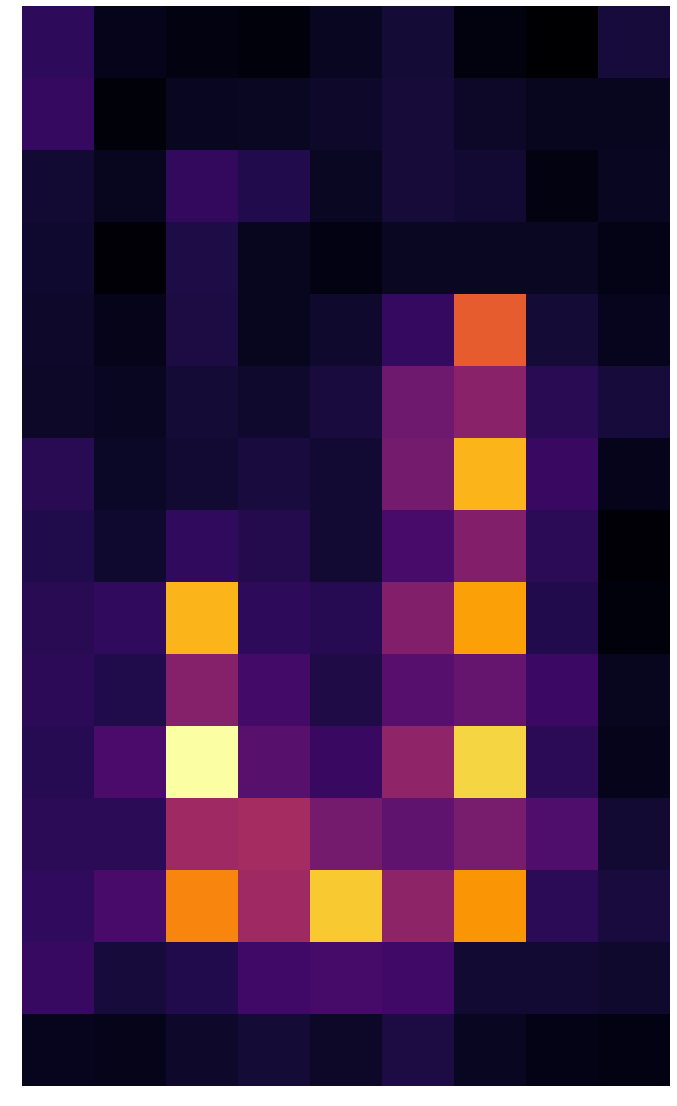

In [30]:
savePureIm(avgPic, 'J.png')

In [80]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [67]:
makeVid(arr(flippedPics), location+'J_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



## I

In [31]:
day = '7'
reloadMyModules()

In [32]:
arrangement = arr( [[1, 1, 1],
                    [0, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
# I_1 = lowLim=349, lim=383
# best:
# I_2 = lowLim=564, lim=585
# might be more good ones
pics, exactPics = findMatches(arrangement, 37, lowLim=564, lim=585);

exact 570
exact 571
exact 572
exact 573
exact 574
exact 575
exact 576
exact 577
exact 578
exact 579
exact 580
exact 581
exact 582
exact 583
exact 584


In [33]:
avgPic = np.zeros(exactPics[0].shape)
for pic in exactPics:
    avgPic += pic
avgPic /= len(exactPics)

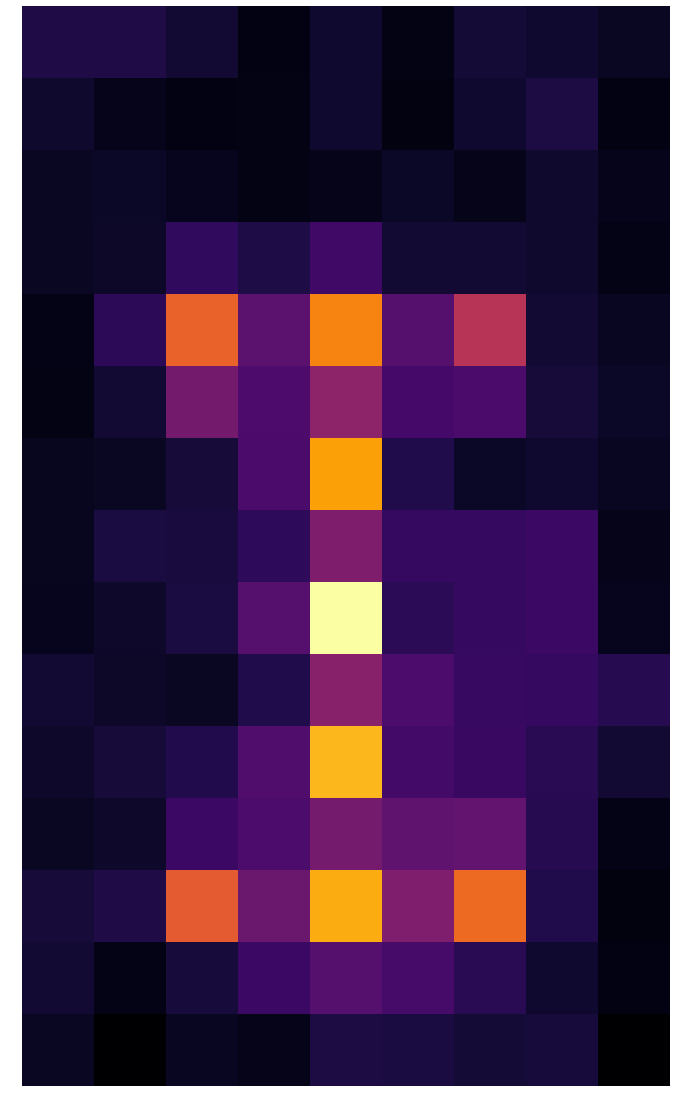

In [34]:
savePureIm(avgPic, 'I.png')

In [90]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [91]:
makeVid(arr(flippedPics), location+'I_2.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## L

In [35]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 0],
                    [1, 0, 0],
                    [1, 0, 0],
                    [1, 0, 0],
                    [0, 0, 0]] )
pics, exactPics = findMatches(arrangement, 38, lowLim=133, lim=154);

exact 143
exact 144
exact 145
exact 146
exact 147
exact 148
exact 149
exact 150
exact 151
exact 152
exact 153


In [36]:
avgPic = np.zeros(exactPics[0].shape)
for pic in exactPics:
    avgPic += pic
avgPic /= len(exactPics)

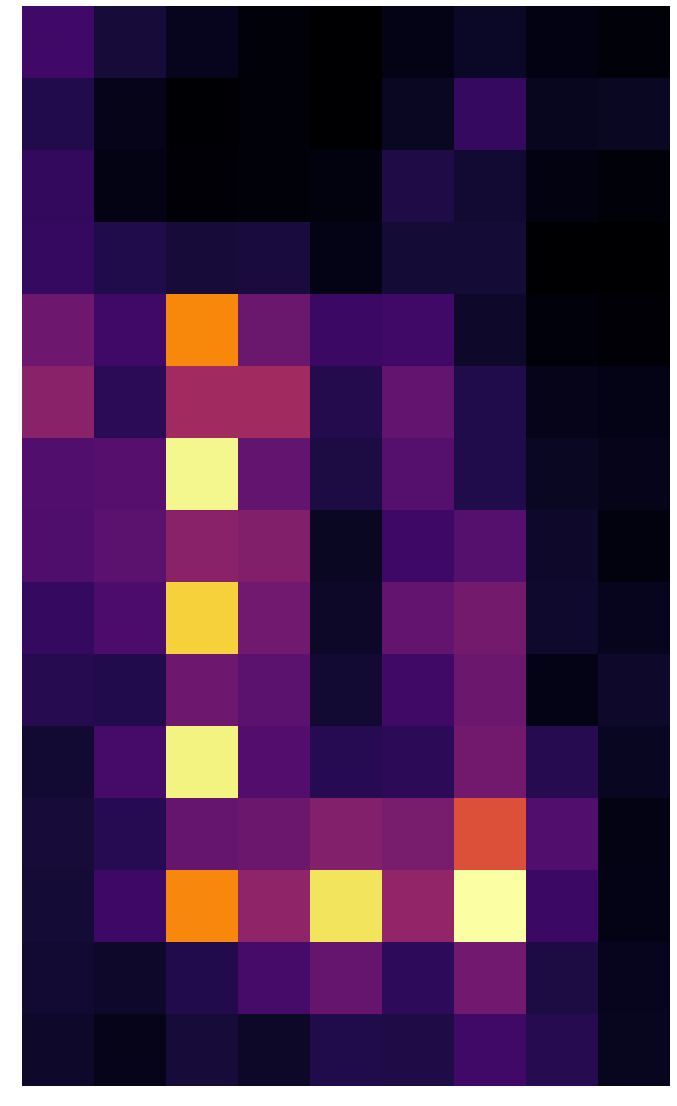

In [37]:
savePureIm(avgPic, 'L.png')

In [189]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [190]:
makeVid(arr(flippedPics), location+'L_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## A

In [38]:
day = '8'
reloadMyModules()

In [39]:
arrangement = arr( [[1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics, exactPics = findMatches(arrangement, 31, lowLim=840, lim=845);

exact 842
exact 843
exact 844


In [40]:
avgPic = np.zeros(exactPics[0].shape)
for pic in exactPics:
    avgPic += pic
avgPic /= len(exactPics)

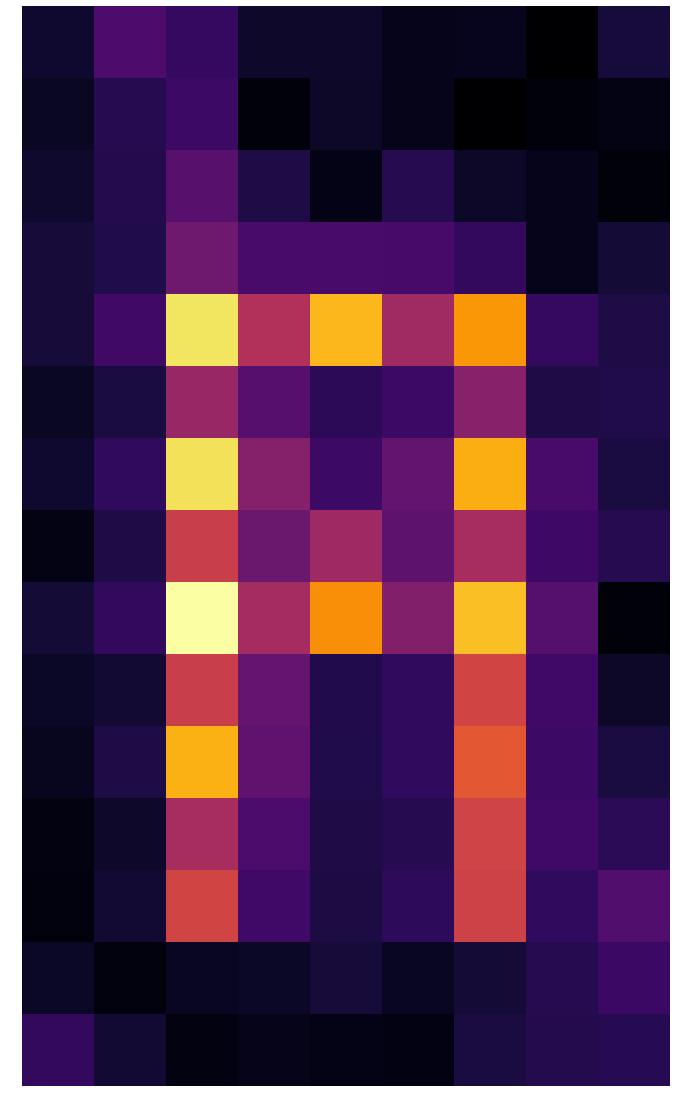

In [41]:
savePureIm(avgPic, 'A.png')

In [126]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [127]:
makeVid(arr(flippedPics), location+'A_1.gif', 'GIF', dur=0.2);

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## T

In [120]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [121]:
arrangement = arr( [[0, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 46, lowLim=968, lim=996);

exact 980
exact 981
exact 982
exact 983
exact 984
exact 985
exact 986
exact 987
exact 988
exact 989
exact 990
exact 991
exact 992
exact 993
exact 994
exact 995


In [122]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [123]:
makeVid(arr(flippedPics), location+'T_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## O

In [17]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [18]:
pics = findMatches(arrangement, 48, lowLim=771, lim=784);

Loading HDF5 File...

KeyError: "Unable to open object (Object 'seq #1 variables' doesn't exist)"

In [139]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [140]:
makeVid(arr(flippedPics), location+'O_4.gif', 'gif', dur=0.2)

In [131]:
pics = findMatches(arrangement, 48, lowLim=544, lim=557);

exact 551
exact 552
exact 553
exact 554
exact 555
exact 556


In [132]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [133]:
makeVid(arr(flippedPics), location+'O_3.gif', 'gif', dur=0.2)

In [122]:
pics = findMatches(arrangement, 48, lowLim=175, lim=185);
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

exact 183
exact 184


In [123]:
makeVid(arr(flippedPics), location+'O_2.gif', 'gif', dur=0.2)

In [114]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 48, lowLim=3339, lim=3360);
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

exact 3343
exact 3344
exact 3345
exact 3346
exact 3347
exact 3348
exact 3349
exact 3350
exact 3351
exact 3352
exact 3353
exact 3354
exact 3355
exact 3356
exact 3357
exact 3358
exact 3359


In [116]:
makeVid(arr(flippedPics), location+'O_1.gif', 'gif', dur=0.2)

## concatenated O

In [20]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )

In [29]:
from importlib import reload
import AnalysisHelpers
reload(AnalysisHelpers)
setPath(day, month, year)

NameError: name 'day' is not defined

In [31]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [32]:
pics = findMatches(arrangement, 48, lowLim=771, lim=784);
flippedPics4 = []
for pic in pics:
    flippedPics4.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics4[-1][-i-1] = row
        
pics = findMatches(arrangement, 48, lowLim=544, lim=557);
flippedPics3 = []
for pic in pics:
    flippedPics3.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics3[-1][-i-1] = row

pics = findMatches(arrangement, 48, lowLim=175, lim=185);
flippedPics2 = []
for pic in pics:
    flippedPics2.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics2[-1][-i-1] = row
        
pics = findMatches(arrangement, 48, lowLim=3339, lim=3360);
flippedPics1 = []
for pic in pics:
    flippedPics1.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics1[-1][-i-1] = row

Loading HDF5 File...Loaded File Successfully.
exact 778
exact 779
exact 780
exact 781
exact 782
exact 783
Loading HDF5 File...Loaded File Successfully.
exact 551
exact 552
exact 553
exact 554
exact 555
exact 556
Loading HDF5 File...Loaded File Successfully.
exact 183
exact 184
Loading HDF5 File...Loaded File Successfully.
exact 3343
exact 3344
exact 3345
exact 3346
exact 3347
exact 3348
exact 3349
exact 3350
exact 3351
exact 3352
exact 3353
exact 3354
exact 3355
exact 3356
exact 3357
exact 3358
exact 3359


In [33]:
concData = arr(flippedPics1)
print(concData.shape)
concData = np.concatenate((concData, flippedPics2))
print(concData.shape)
concData = np.concatenate((concData, flippedPics3))
print(concData.shape)
concData = np.concatenate((concData, flippedPics4))
print(concData.shape)
finPts = [21, 31, 44, 57]

(21, 15, 9)
(31, 15, 9)
(44, 15, 9)
(57, 15, 9)


In [53]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm


infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale
    
    pics = np.uint16(pics / max(pics.flatten()) * 350)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - 50)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,15])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid('off')
        ax.imshow(pic, aspect='equal')
        ax.text(0,14,str(sequenceCount) + "." + str(picCount+1-offset), color='white', fontsize=40)
        ax.plot([2,4],[1,1],color='w', linewidth=2)
        ax.plot([2,2],[0.8, 1.2], 'w', linewidth=2)
        ax.plot([4,4],[0.8, 1.2], 'w', linewidth=2)
        ax.text(2.0, 0.8,r"$1.7 \mu m $", color='white', fontsize=40)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        savefig(name, dpi=19)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    #pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)
from IPython.display import Image, HTML, display

In [54]:
makeVid(concData, location+'Low-Res-Nice-O.gif', 'gif', dur=0.15, finLabels=finPts, finTxt="Fin.")

## M

In [23]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [19]:
import AnalysisHelpers

In [20]:
from importlib import reload
reload(AnalysisHelpers)

<module 'AnalysisHelpers' from 'C:\\Users\\Mark-Brown\\Documents\\Analysis-Code\\AnalysisHelpers.py'>

In [24]:
arrangement = arr( [[1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 54, lowLim=2971, lim=2986);

exact 2975
exact 2976
exact 2977
exact 2978
exact 2979
exact 2980
exact 2981
exact 2982
exact 2983
exact 2984
exact 2985


In [25]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [26]:
makeVid(arr(flippedPics), location+'M_1.gif', 'gif', dur=0.2)

## S

In [109]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [110]:
arrangement = arr( [[1, 1, 1],
                    [0, 0, 1],
                    [1, 1, 1],
                    [1, 0, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 49, lowLim=50, lim=74);

exact 58
exact 59
exact 60
exact 61
exact 62
exact 63
exact 64
exact 65
exact 66
exact 67
exact 68
exact 69
exact 70
exact 71
exact 72
exact 73


In [111]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [112]:
makeVid(arr(flippedPics), location+'S_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## R

In [31]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [32]:
arrangement = arr( [[1, 0, 1],
                    [1, 1, 0],
                    [1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 55, lowLim=118, lim=134);

exact 123
exact 124
exact 125
exact 126
exact 127
exact 128
exact 129
exact 130
exact 131
exact 132
exact 133


In [33]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [34]:
makeVid(arr(flippedPics), location+'R_1.gif', 'gif', dur=0.2)

## E

In [236]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 0],
                    [1, 1, 1],
                    [1, 0, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 56, lowLim=1525, lim=1536);

exact 1531
exact 1532
exact 1533
exact 1534
exact 1535


In [237]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [238]:
makeVid(arr(flippedPics), location+'E_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## G

In [ ]:
yearloc="2017"
monthloc="December"
dayloc="8"
setPath(dayloc, monthloc, yearloc)

In [ ]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 27, lowLim = 1917, lim=1929);

In [ ]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [ ]:
makeVid(arr(flippedPics), location+'G_1.gif', 'gif', dur=0.2)

In [214]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

## B

In [21]:
yearloc="2017"
monthloc="December"
dayloc="7"
setPath(dayloc, monthloc, yearloc)

In [22]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 0],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 57, lowLim=2945, lim=2951);

exact 2948
exact 2949
exact 2950


In [23]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [24]:
makeVid(arr(flippedPics), location+'B_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## C

In [221]:
yearloc="2017"
monthloc="December"
dayloc="8"
setPath(dayloc, monthloc, yearloc)

In [225]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 0],
                    [1, 0, 0],
                    [1, 0, 0],
                    [1, 1, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 32, lowLim=331, lim=353);

exact 340
exact 341
exact 342
exact 343
exact 344
exact 345
exact 346
exact 347
exact 348
exact 349
exact 350
exact 351
exact 352


In [226]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [227]:
makeVid(arr(flippedPics), location+'C_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## H

34

In [71]:
arrangement = arr( [[1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 34, lowLim=1582, lim=1593);

exact 1587
exact 1588
exact 1589
exact 1590
exact 1591
exact 1592


In [72]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [73]:
makeVid(arr(flippedPics), location+'H_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## Y

35

In [88]:
arrangement = arr( [[0, 1, 0],
                    [0, 1, 0],
                    [1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 35, lowLim=941, lim=962);

exact 949
exact 950
exact 951
exact 952
exact 953
exact 954
exact 955
exact 956
exact 957
exact 958
exact 959
exact 960
exact 961


In [89]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [91]:
makeVid(arr(flippedPics), location+'Y_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## n

In [30]:
yearloc="2017"
monthloc="December"
dayloc="8"
setPath(dayloc, monthloc, yearloc)

In [31]:
arrangement = arr( [[1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 1],
                    [0, 0, 0]] )
# n_1 = lowLim=924, lim=932
# n_2
pics = findMatches(arrangement, 36, lowLim=803, lim=813);

exact 810
exact 811
exact 812


In [32]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [33]:
makeVid(arr(flippedPics), location+'n_2.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## K

37

In [34]:
yearloc="2017"
monthloc="December"
dayloc="8"
setPath(dayloc, monthloc, yearloc)

In [35]:
arrangement = arr( [[1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 0],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 37, lowLim=999, lim=1009);

exact 1005
exact 1006
exact 1007
exact 1008


In [36]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [37]:
makeVid(arr(flippedPics), location+'K_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## U

38

In [143]:
arrangement = arr( [[1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 38, lowLim=302, lim=312);

exact 310
exact 311


In [144]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [146]:
makeVid(arr(flippedPics), location+'U_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## W

In [26]:
yearloc="2017"
monthloc="December"
dayloc="8"
setPath(dayloc, monthloc, yearloc)

In [27]:
arrangement = arr( [[1, 0, 1],
                    [1, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 40, lowLim=0, lim=7);

exact 3
exact 4
exact 5
exact 6


In [28]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [29]:
makeVid(arr(flippedPics), location+'W_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning:

Lossy conversion from float64 to uint8, range [0, 1]



## D

In [167]:
arrangement = arr( [[1, 1, 0],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 0, 1],
                    [1, 1, 0],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 41, lowLim=1302, lim=1316);

exact 1309
exact 1310
exact 1311
exact 1312
exact 1313
exact 1314
exact 1315


In [168]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [169]:
makeVid(arr(flippedPics), location+'D_2.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


## !

In [175]:
arrangement = arr( [[0, 1, 0],
                    [0, 0, 0],
                    [0, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0],
                    [0, 0, 0]] )
pics = findMatches(arrangement, 42, lowLim=391, lim=402);

exact 396
exact 397
exact 398
exact 399
exact 400
exact 401


In [176]:
flippedPics = []
for pic in pics:
    flippedPics.append(np.zeros((15, 9)))
    for i, row in enumerate(pic):
        flippedPics[-1][-i-1] = row

In [177]:
makeVid(arr(flippedPics), location+'!_1.gif', 'gif', dur=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


# Loading Gifs

### 3x3 loading (for Tobias Talk)

In [18]:
year="2018"
month="April"
day="15"

In [19]:
from importlib import reload
import AnalysisHelpers
reload(AnalysisHelpers)
setPath(day, month, year)

In [1]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm


infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale    
    pics = np.uint16(pics / max(pics.flatten()) * 350)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - 50)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,15])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid('off')
        ax.imshow(pic, aspect='equal')
        if includeCount:
            ax.text(0,14,str(sequenceCount) + "." + str(picCount+1-offset), color='white', fontsize=40)
        ax.plot([2,4],[1,1],color='w', linewidth=2)
        ax.plot([2,2],[0.8, 1.2], 'w', linewidth=2)
        ax.plot([4,4],[0.8, 1.2], 'w', linewidth=2)
        ax.text(2.02, 0.8,r"$2.0 \mu m $", color='white', fontsize=30)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        margins(0,0)
        gca().yaxis.set_major_locator(NullLocator())
        gca().xaxis.set_major_locator(NullLocator())
        savefig(name, dpi=40, bbox_inches='tight', pad_inches=0.0)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    #pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)
from IPython.display import Image, HTML, display

In [21]:
import AnalysisHelpers as AH

In [22]:
setPath(day, month, year)

In [127]:
f = AH.openHDF5(19)
pics = f['Andor']['Pictures']

In [128]:
vidPics = pics[0:-2:2]
vidPics = vidPics[:,6:15,6:15]

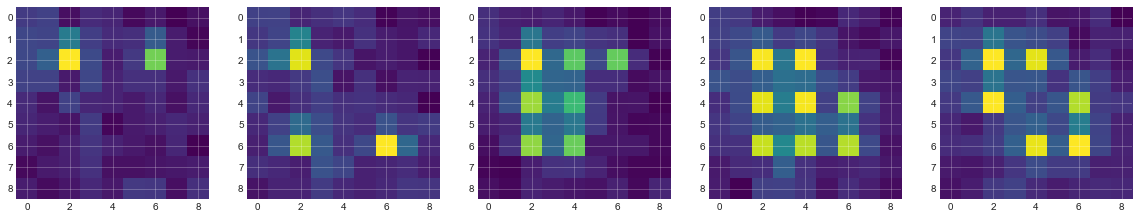

In [133]:
f, ax = subplots(1,5, figsize=(20,40))
ax[0].imshow(vidPics[0])
ax[1].imshow(vidPics[1])
ax[2].imshow(vidPics[2])
ax[3].imshow(vidPics[3])
ax[4].imshow(vidPics[4])

In [145]:
makeVid(vidPics, location+'3x3-Loading.gif', 'gif', dur=0.15, includeCount=False)

### 10x10 loading for tobias talk

In [9]:
location = 'C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/Inferno/'

In [26]:
year="2018"
month="April"
day="30"

In [27]:
setPath(day, month, year)

In [22]:
import AnalysisHelpers as AH

In [35]:
f = AH.openHDF5(34)
pics = f['Andor']['Pictures']

In [36]:
vidPics = pics[100:200:2]
vidPics = vidPics[:]

In [43]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm


infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]
cividisMap = [mpl.cm.cividis(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap, baseCutoff=50, multiplier=350):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale    
    pics = np.uint16(pics / max(pics.flatten()) * multiplier)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - baseCutoff)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,15])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid(False)
        ax.imshow(pic, aspect='equal')
        if includeCount:
            ax.text(0,14,str(sequenceCount) + "." + str(picCount+1-offset), color='white', fontsize=40)
        ax.plot([2,4],[1,1],color='w', linewidth=2)
        ax.plot([2,2],[0.8, 1.2], 'w', linewidth=2)
        ax.plot([4,4],[0.8, 1.2], 'w', linewidth=2)
        ax.text(2.02, 0.8,r"$2.0 \mu m $", color='white', fontsize=30)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        margins(0,0)
        gca().yaxis.set_major_locator(NullLocator())
        gca().xaxis.set_major_locator(NullLocator())
        savefig(name, dpi=40, bbox_inches='tight', pad_inches=0.0)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    #pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)
from IPython.display import Image, HTML, display

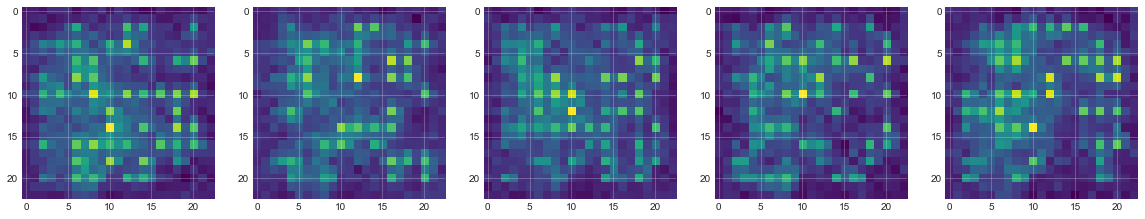

In [38]:
f, ax = subplots(1,5, figsize=(20,40))
ax[0].imshow(vidPics[0])
ax[1].imshow(vidPics[1])
ax[2].imshow(vidPics[2])
ax[3].imshow(vidPics[3])
ax[4].imshow(vidPics[4])

In [49]:
location = 'C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/Viridis/'

In [50]:
makeVid(vidPics, location+'10x10-Loading.gif', 'gif', dur=0.15, vidMap=viridisMap, includeCount=False, baseCutoff=100, multiplier=550)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



### updated 10x10

In [15]:
location = 'C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/Inferno/'

In [22]:
year="2018"
month="May"
day="4"

In [23]:
setPath(day, month, year)

In [24]:
import AnalysisHelpers as AH

In [25]:
f = AH.openHDF5(18)
pics = f['Andor']['Pictures']

In [26]:
vidPics = pics[100:200:2]
vidPics = vidPics[:]

In [50]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm


infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]
cividisMap = [mpl.cm.cividis(i)[:-1] for i in range(256)]
jetMap = [mpl.cm.jet(i)[:-1] for i in range(256)]
greyMap = [mpl.cm.Greys(i)[:-1] for i in range(256)]
greysReversedMap = list(reversed(greyMap))
bluesMap = [mpl.cm.Blues(i)[:-1] for i in range(256)]
orangesMap = [mpl.cm.Oranges(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap, baseCutoff=50, multiplier=350):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale    
    pics = np.uint16(pics / max(pics.flatten()) * multiplier)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - baseCutoff)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,15])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid(False)
        ax.imshow(pic, aspect='equal')
        if includeCount:
            ax.text(0,14,str(sequenceCount) + "." + str(picCount+1-offset), color='white', fontsize=40)
        ax.plot([2,4],[1,1],color='w', linewidth=2)
        ax.plot([2,2],[0.8, 1.2], 'w', linewidth=2)
        ax.plot([4,4],[0.8, 1.2], 'w', linewidth=2)
        ax.text(2.02, 0.8,r"$2.0 \mu m $", color='white', fontsize=30)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        margins(0,0)
        gca().yaxis.set_major_locator(NullLocator())
        gca().xaxis.set_major_locator(NullLocator())
        savefig(name, dpi=40, bbox_inches='tight', pad_inches=0.0)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    #pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)
from IPython.display import Image, HTML, display

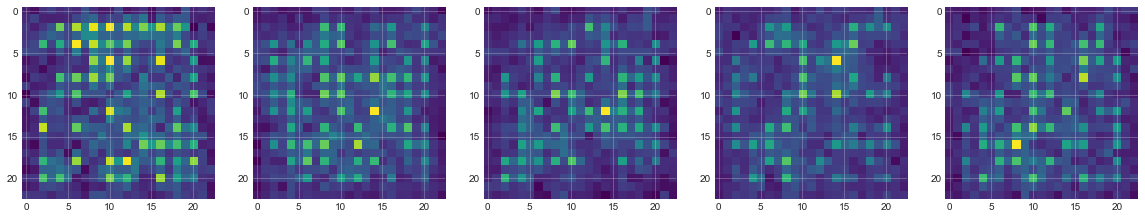

In [28]:
f, ax = subplots(1,5, figsize=(20,40))
ax[0].imshow(vidPics[0])
ax[1].imshow(vidPics[1])
ax[2].imshow(vidPics[2])
ax[3].imshow(vidPics[3])
ax[4].imshow(vidPics[4])

In [54]:
location = 'C:/Users/Mark-Brown/Documents/Analysis-Code/Videos/oranges/'

In [55]:
makeVid(vidPics, location+'10x10-Loading-updated.gif', 'gif', dur=0.15, vidMap=orangesMap, includeCount=False, baseCutoff=100, multiplier=550)